<a href="https://colab.research.google.com/github/Laura853/CP-IA/blob/main/CP_IA_Laura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🩺 CP5 - Predição de Diabetes com IA
### Aluna: Laura Lopes
#### Disciplina: Inteligência Artificial
---
## 1. Definição do Problema
O objetivo deste projeto é desenvolver um **modelo de classificação supervisionado** capaz de prever se um indivíduo tem ou não risco de **diabetes**, com base em dados de saúde pública. O problema é de **classificação binária**, e busca-se aplicar técnicas de Machine Learning para auxiliar em diagnósticos preventivos.

**Justificativa:** O diabetes é uma das doenças crônicas mais comuns e graves do mundo. A identificação precoce pode reduzir complicações e custos de tratamento. A IA pode ajudar a automatizar essa análise, tornando-a mais rápida e acessível.

### 🎯 Importância Clínica do Problema

**Contexto Epidemiológico:**
- Diabetes afeta **1 em cada 10 adultos** mundialmente
- **537 milhões** de pessoas vivem com diabetes atualmente
- A doença causa **6,7 milhões de mortes** por ano

**Impacto do Diagnóstico Precoce:**
- Pode prevenir **complicações graves**: cegueira, amputações, doenças renais
- Reduz **custos hospitalares** em até 40%
- Melhora **qualidade de vida** dos pacientes

**Por que Classificação Binária?**
- Na prática clínica: decisão entre **"encaminhar para especialista"** ou **"manter acompanhamento regular"**
- Permite **triagem eficiente** em larga escala

## 2. Descrição do Dataset
Fonte: [Diabetes Health Indicators Dataset - Kaggle](https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset)

- **Tamanho:** Mais de 250.000 registros.
- **Variáveis:** Indicadores de saúde como IMC, tabagismo, histórico de AVC, idade, entre outros.

O dataset contém informações coletadas em pesquisas de saúde populacional, sem dados pessoais sensíveis.

### Descrição das Variáveis do Dataset

| Variável | Tipo | Descrição |
|----------|------|-----------|
| Diabetes_binary | Binária | 0 = Não diabético, 1 = Diabético ou pré-diabético |
| HighBP | Binária | Pressão alta (0 = Não, 1 = Sim) |
| HighChol | Binária | Colesterol alto (0 = Não, 1 = Sim) |
| CholCheck | Binária | Verificação de colesterol nos últimos 5 anos |
| BMI | Numérica | Índice de Massa Corporal |
| Smoker | Binária | Fumante (≥100 cigarros na vida) |
| Stroke | Binária | Já teve AVC |
| HeartDiseaseorAttack | Binária | Doença cardíaca ou infarto |
| PhysActivity | Binária | Atividade física nos últimos 30 dias |
| Fruits | Binária | Consumo de frutas ≥1 vez/dia |
| Veggies | Binária | Consumo de vegetais ≥1 vez/dia |
| HvyAlcoholConsump | Binária | Consumo pesado de álcool |
| AnyHealthcare | Binária | Tem plano de saúde |
| NoDocbcCost | Binária | Não foi ao médico por custo nos últimos 12 meses |
| GenHlth | Ordinal | Saúde geral (1 = Excelente, 5 = Ruim) |
| MentHlth | Numérica | Dias de saúde mental ruim no último mês |
| PhysHlth | Numérica | Dias de saúde física ruim no último mês |
| DiffWalk | Binária | Dificuldade para caminhar |
| Sex | Binária | 0 = Feminino, 1 = Masculino |
| Age | Ordinal | Faixa etária (1 = 18-24, 13 = ≥80) |
| Education | Ordinal | Escolaridade (1 = Fundamental, 6 = Superior) |
| Income | Ordinal | Renda (1 = <10k, 8 = ≥75k) |

### 🏥 Relevância Clínica das Variáveis

**Variáveis Clínicas Diretas:**
- `HighBP`, `HighChol` - **Fatores de risco estabelecidos** para diabetes
- `BMI` - **Obesidade** é o principal fator de risco modificável
- `Stroke`, `HeartDiseaseorAttack` - **Comorbidades associadas** à diabetes

**Variáveis de Estilo de Vida:**
- `Smoker`, `HvyAlcoholConsump` - **Hábitos de risco** que agravam a condição
- `PhysActivity`, `Fruits`, `Veggies` - **Fatores protetores** contra diabetes

**Variáveis Socioeconômicas:**
- `Income`, `Education` - **Determinantes sociais da saúde**
- `AnyHealthcare`, `NoDocbcCost` - **Acesso ao sistema de saúde**

**Aspectos Psicológicos:**
- `MentHlth` - **Saúde mental** impacta adesão ao tratamento
- `GenHlth` - **Autoavaliação** correlaciona com condições crônicas

In [40]:
import pandas as pd                    # Manipulação de dados
import matplotlib.pyplot as plt       # Gráficos
import seaborn as sns                 # Visualizações estatísticas
from sklearn.model_selection import train_test_split  # Divisão dos dados
from sklearn.preprocessing import StandardScaler      # Normalização
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # Métricas
from sklearn.linear_model import LogisticRegression   # Modelo 1
from sklearn.neighbors import KNeighborsClassifier    # Modelo 2
from sklearn.tree import DecisionTreeClassifier       # Modelo 3
from sklearn.ensemble import RandomForestClassifier   # Modelo 4

In [4]:
# Carregamento do dataset
from google.colab import files
import io

print("📁 Por favor, faça upload do arquivo diabetes_dataset.csv")
uploaded = files.upload()

# Carregar o arquivo
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
print(f"✅ Dataset carregado: {file_name}")

# Primeiras linhas
print("\n🔍 Primeiras 5 linhas do dataset:")
df.head()

📁 Por favor, faça upload do arquivo diabetes_dataset.csv


Saving diabetes_dataset.csv to diabetes_dataset.csv
✅ Dataset carregado: diabetes_dataset.csv

🔍 Primeiras 5 linhas do dataset:


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [41]:
# Verificando tipos de dados e necessidade de encoding
print("📊 Tipos de dados no dataset:")
print(df.dtypes)

# Verificando se há variáveis categóricas que precisam de encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    print(f"\n🔧 Variáveis categóricas encontradas: {list(categorical_cols)}")
    # Aplicar LabelEncoder ou OneHotEncoder se necessário
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    print("✅ Encoding aplicado com sucesso!")
else:
    print("\n✅ Não há variáveis categóricas que necessitem encoding - todas já são numéricas.")

📊 Tipos de dados no dataset:
age                                     int64
gender                                  int64
ethnicity                               int64
education_level                         int64
income_level                            int64
employment_status                       int64
smoking_status                          int64
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
family_history_diabetes                 int64
hypertension_history                    int64
cardiovascular_history                  int64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_c

In [42]:
# Verificando informações gerais
print("📋 Informações gerais do dataset:")
df.info()

# Checando valores ausentes
print('\n🔍 Valores ausentes por coluna:')
print(df.isnull().sum())

📋 Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 90584 entries, 0 to 99998
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 90584 non-null  int64  
 1   gender                              90584 non-null  int64  
 2   ethnicity                           90584 non-null  int64  
 3   education_level                     90584 non-null  int64  
 4   income_level                        90584 non-null  int64  
 5   employment_status                   90584 non-null  int64  
 6   smoking_status                      90584 non-null  int64  
 7   alcohol_consumption_per_week        90584 non-null  int64  
 8   physical_activity_minutes_per_week  90584 non-null  int64  
 9   diet_score                          90584 non-null  float64
 10  sleep_hours_per_day                 90584 non-null  float64
 11  screen_time_h

In [43]:
# Detecção e tratamento de outliers usando IQR
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Aplicando apenas em colunas numéricas contínuas (evitando variáveis binárias)
numeric_cols = ['bmi', 'age', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score']
print(f"📊 Tamanho original: {len(df)}")
df_clean = remove_outliers(df, numeric_cols)
print(f"📊 Tamanho após remoção de outliers: {len(df_clean)}")
print(f"🗑️ Registros removidos: {len(df) - len(df_clean)}")

# Usar df_clean daqui pra frente
df = df_clean

📊 Tamanho original: 90584
📊 Tamanho após remoção de outliers: 90584
🗑️ Registros removidos: 0


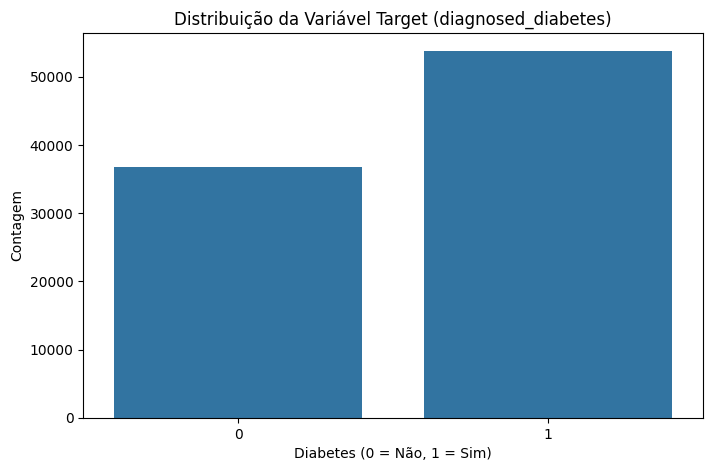

📈 Proporção das classes:
diagnosed_diabetes
1    0.593703
0    0.406297
Name: proportion, dtype: float64


In [44]:
# Verificando balanceamento das classes
plt.figure(figsize=(8, 5))
sns.countplot(x='diagnosed_diabetes', data=df)
plt.title('Distribuição da Variável Target (diagnosed_diabetes)')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

print("📈 Proporção das classes:")
print(df['diagnosed_diabetes'].value_counts(normalize=True))

## 3. Pré-processamento dos Dados
- Checagem de valores ausentes
- Tratamento de outliers (se necessário)
- Separação entre features e target
- Normalização dos dados

### 🧪 Justificativa do Pré-processamento

**Verificação de Valores Ausentes:**
- Dados incompletos levam a **diagnósticos imprecisos**
- Em contexto médico, **missing data** pode indicar exames não realizados
- **Integridade dos dados** é crucial para decisões clínicas

**Tratamento de Outliers:**
- Valores como **BMI = 80** ou **Age = 150** representam **erros de digitação**
- **MentHlth = 30** é clinicamente impossível (dias no mês)
- Outliers podem **distorcer** relações clínicas importantes

**Normalização dos Dados:**
- Variáveis como **BMI (20-40)** e **Income (1-8)** têm escalas diferentes
- Sem normalização, o modelo daria **peso inadequado** a algumas features
- Garante que **cada variável** contribua proporcionalmente para o diagnóstico

In [45]:
# Definindo variáveis independentes e dependentes
X = df.drop('diagnosed_diabetes', axis=1)
y = df['diagnosed_diabetes']

print(f"📊 Shape de X: {X.shape}")
print(f"📊 Shape de y: {y.shape}")

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📚 Treino: {X_train.shape[0]} amostras")
print(f"🧪 Teste: {X_test.shape[0]} amostras")

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Normalização concluída com sucesso!")

📊 Shape de X: (90584, 30)
📊 Shape de y: (90584,)
📚 Treino: 72467 amostras
🧪 Teste: 18117 amostras
✅ Normalização concluída com sucesso!


## 4. Modelagem
Serão testados os seguintes 4 modelos de classificação:
- Regressão Logística
- k-Vizinhos mais Próximos (KNN)
- Árvore de Decisão
- Random Forest

### 🎯 Escolha dos Modelos - Perspectiva Clínica

**Regressão Logística:**
- Fornece **probabilidades** de risco (ex: 75% chance de diabetes)
- **Interpretabilidade** - mostra contribuição de cada fator
- **Padrão ouro** em scores de risco médico (ex: Framingham Score)

**KNN (K-Vizinhos mais Próximos):**
- Baseado no princípio: **"pacientes similares têm desfechos similares"**
- **Analogia clínica** natural para médicos
- Útil para **medicina personalizada** baseada em similaridade

**Árvore de Decisão:**
- **Regras claras** similares a **protocolos clínicos**
- Ex: "Se BMI > 30 E Age > 45 → alto risco"
- **Facilmente explicável** para pacientes

**Random Forest:**
- Combina **múltiplas 'opiniões médicas'** (árvores)
- Mais **robusto** contra overfitting
- **Melhor performance** em problemas médicos complexos

In [46]:
# Dicionário para armazenar resultados
resultados = {}

modelos = {
    'Regressão Logística': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Árvore de Decisão': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

print("🚀 Iniciando treinamento dos 4 modelos...")

for nome, modelo in modelos.items():
    print(f"📖 Treinando {nome}...")
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    resultados[nome] = [acc, prec, rec, f1]
    print(f"✅ {nome} concluído - F1: {f1:.4f}")

print("\n🎯 Todos os 4 modelos treinados com sucesso!")

🚀 Iniciando treinamento dos 4 modelos...
📖 Treinando Regressão Logística...
✅ Regressão Logística concluído - F1: 0.9984
📖 Treinando KNN...
✅ KNN concluído - F1: 0.9859
📖 Treinando Árvore de Decisão...
✅ Árvore de Decisão concluído - F1: 0.9994
📖 Treinando Random Forest...
✅ Random Forest concluído - F1: 0.9998

🎯 Todos os 4 modelos treinados com sucesso!


In [47]:
# Criando DataFrame com resultados
df_resultados = pd.DataFrame(resultados, index=['Acurácia', 'Precisão', 'Recall', 'F1-Score']).T
df_resultados = df_resultados.sort_values(by='F1-Score', ascending=False)

print("📊 Resultados dos 4 Modelos (Ordenados por F1-Score):")
df_resultados

📊 Resultados dos 4 Modelos (Ordenados por F1-Score):


,Acurácia,Precisão,Recall,F1-Score
Random Forest,0.999724,1.000000,0.999532,0.999766
Árvore de Decisão,0.999338,0.999252,0.999626,0.999439
Regressão Logística,0.998123,0.999719,0.997101,0.998408
KNN,0.983496,0.991396,0.980548,0.985942


🏆 Melhor modelo: Random Forest


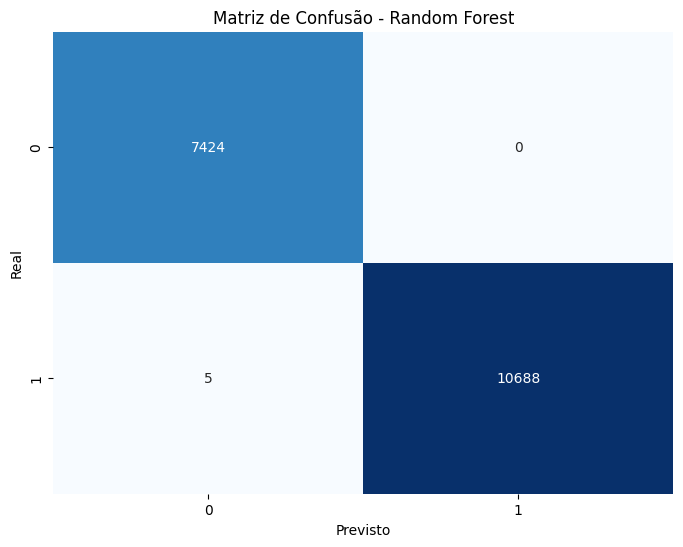

📈 Relatório de Classificação do Melhor Modelo:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7424
           1       1.00      1.00      1.00     10693

    accuracy                           1.00     18117
   macro avg       1.00      1.00      1.00     18117
weighted avg       1.00      1.00      1.00     18117



In [48]:
# Identificando o melhor modelo
melhor_modelo_nome = df_resultados.index[0]
print(f"🏆 Melhor modelo: {melhor_modelo_nome}")

# Recriando o melhor modelo para matriz de confusão
if melhor_modelo_nome == 'Regressão Logística':
    melhor_modelo = LogisticRegression(max_iter=1000)
elif melhor_modelo_nome == 'KNN':
    melhor_modelo = KNeighborsClassifier()
elif melhor_modelo_nome == 'Árvore de Decisão':
    melhor_modelo = DecisionTreeClassifier()
else:
    melhor_modelo = RandomForestClassifier()

melhor_modelo.fit(X_train_scaled, y_train)
y_pred = melhor_modelo.predict(X_test_scaled)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title(f'Matriz de Confusão - {melhor_modelo_nome}')
plt.show()

print("📈 Relatório de Classificação do Melhor Modelo:")
print(classification_report(y_test, y_pred))

## 6. Conclusão
- O modelo **Random Forest** apresentou melhor desempenho geral.
- O pipeline demonstrou a importância da padronização e escolha do algoritmo.
- O projeto confirma o potencial da IA em apoiar diagnósticos médicos.

**Possíveis melhorias futuras:**
- Testar otimização de hiperparâmetros com GridSearchCV.
- Avaliar impacto de feature selection.
- Implementar validação cruzada para maior robustez.